# DSCI 521 Term Project - Phase 1

---
 
- Devi Supraja Ratakonda:

    - _Background_: I am currently pursuing my master’s in data science since January 2021. I chose data science as I have already done my bachelor’s in computer science and had almost 3 years of experience in the industry. I have interned as MEAN stack developer in product development department working on multiple real-time projects. Then, I moved onto my most challenging role (Software engineer) in Hexagon working on large-scale applications on both front and back-end. 

    - _Self-identified Skills_: As my resume indicates my professional experience revolved around developing products using latest technologies such as Angular js, React, Neo4J, MongoDB, Node js etc. I have done elective courses as Data mining and Warehousing, Agent based machine learning and Parallel distributed systems in my Bachelors. Designing appropriate schemas and handling data is one my key strengths. I have academic and personal projects where multiple models (Random forest, SVM, weight boosting, etc) are tweaked for forecasting using tools like Weka and R-studio.

## The Dataset

### Purpose / Scope

In the modern economy turnover is a continuous problem for organizations and is ubiquitous in every type and size of organization, and at every organizational level. It is an expensive liability due to the costs of termination, advertising, recruitment, selection, hiring, and so on; the Center for American Progress estimates that companies pay approximately one fifth the salary to replace an employee. When an employee leaves an organization, the existing staff are often forced to absorb the workload and responsibilities of the departing employee, hindering the productivity in their usual responsibilities and decreasing job satisfaction. Staff turnover is a critical issue to the field of human resources management; using Predictive Employee Turnover Analysis (PETA)  and Workforce Analytics HR departments can use existing employee datasets to allow for  better business planning, as well as stable productivity and employee satisfaction. This analysis provides scalable, adaptable tools that can be used with any dataset with compatible inputs, as well as a blueprint for a tool that could be adapted by any of the dozens of developers of employee management and retention software.  
 
We have obtained a dataset from Kaggle which includes demographics of a sample of  data scientists. The dataset includes information about each data scientist, and whether or not they are looking for a job change. This dataset was generated with the intention of creating tools to help retain employees. 



|Column                |Description                                                                |Data Type|Example                                          |FIELD5|
|----------------------|---------------------------------------------------------------------------|---------|-------------------------------------------------|------|
|enrollee_id           |Enrolled id of the user                                                    |Int      |27724, 21465, 27302                              |      |
|city                  |city code of user he is currently residing                                 |String   |city_103, city_13, city_173                      |      |
|city_development_index|Developement index of the city user is residing in                         |Float    |0.827, 0.92, 0.762                               |      |
|gender                |Gender of the user                                                         |String   |Female, Male                                     |      |
|relevent_experience   |Tells whether user has relevant experience in the field they are hiring for|String   |Has relevent experience, No relevent experience  |      |
|enrolled_university   |what type of course they are enrolled in training                          |String   |Full time course, Part time course, no_enrollment|      |
|education_level       |the highest education user has studied                                     |String   |Graduate, High School, Masters                   |      |
|major_discipline      |The major they studied in thier education                                  |String   |STEM, Business Degree, Other                     |      |
|experience            |The experience they have in the industry                                   |String   |>20, 14, 1                                       |      |
|company_size          |The company size they working in right now                                 |String   |10000+, 100-500, Oct-49                          |      |
|company_type          |The company type user working in right now                                 |String   |Early Stage Startup, Pvt Ltd, Public Sector      |      |
|last_new_job          |Difference in years between previous job and current job                   |String   |never, 4, >4                                     |      |
|training_hours        |training hours user has completed from their company                       |Int      |21, 32, 23                                       |      |


## Analysis 

We downloaded our dataset from Kaggle: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists, and stored the data locally. Webegan by taking a gerneral lookat the data. Overall, there are 13 columns in the dataset, and 19158 rows. 

In [11]:
# Import maodules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# read in data
# we are using only the labeled training set for anlaysis
df = pd.read_csv("aug_train.csv")

In [13]:
# look at rows and columns
df.shape

(19158, 14)

In [14]:
# look at all the column names
list(df.columns)

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

The analysis began by examining the variables within the dataset. There was an initial download and review of a sample dataset to identify the rows and columns present. The sample was reviewed for null values, as well as missing or erroneous data. The range of the data was reviewed to ensure that the data fit within expected parameters. The data dictionary below summarizes these findings.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


In [16]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Of the 13 columns, 2are read in as integer. After exploring the data, we discover that the rest f the columns are catigorical columns, based on the way that they are formated. I would appear that experience and a few other columns should be numerical, bu they contain columns that are grouped, such as >1 or <20. 

Enrollee_id is read in as a int, but should be treated as a string.

Next, we look for any null values in the data. We noticed that gender, company_size, andcompany_type all have a large number of missing values. We will need to keep this in mind for future work. 

In [17]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

First for analysis we looked at the numerical variables. We wanted to understand how these variables are formated and shaped, and how they could be used later in a regrression or classification model. To make target easier to understand in visuals, we have coded it in str_target.

First, we looked at city development index. This is a value ranging from 0 to 1 that measures how developed a city is. The data appears to have a slight leftskew, as it has a long tail on the right. We also used describe to compare the mean and median values for this column. 

In [18]:
df["str_target"] = df["target"].map({1.0: 'Looking for Change', 0: 'Not Looking for Change'})

In [24]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


C:\Users\seban\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


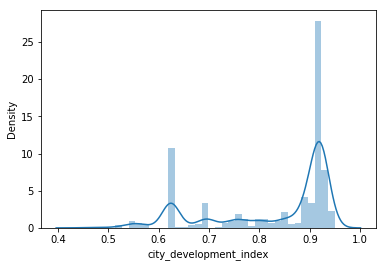

In [19]:
# first look at a histogram of city development index
sns.distplot(df["city_development_index"])

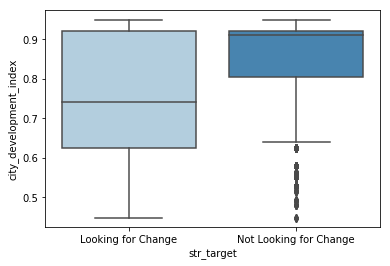

In [21]:
# boxplots of city development grouped by target variable
sns.boxplot(x=df["str_target"], y=df["city_development_index"], palette="Blues")

We then grouped the city development by the target variable to look for a difference in city development between groups. It appears that people who are not looking for a job change tend to have a higher city devlopment index. This could be useful for later regression and classification.

C:\Users\seban\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


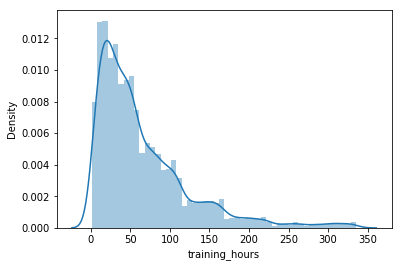

In [22]:
sns.distplot(df["training_hours"])

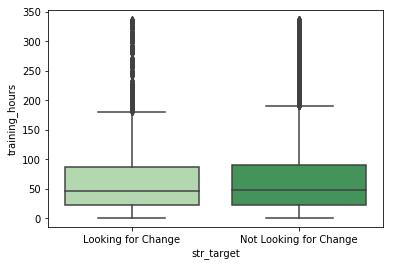

In [23]:
# combine training hours with another variable
sns.boxplot(x=df["str_target"], y=df["training_hours"], palette="Greens")

Next, we looked at the histograms and boxplots for tarining hours. The histogram shows a skew in the data, with a lot of values outliers on the high end. It appears that the spread of training hours looks the same across target variable.

After exploring the numerical values, we look a look at the catigorical values in the dataset.

In [25]:
df.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

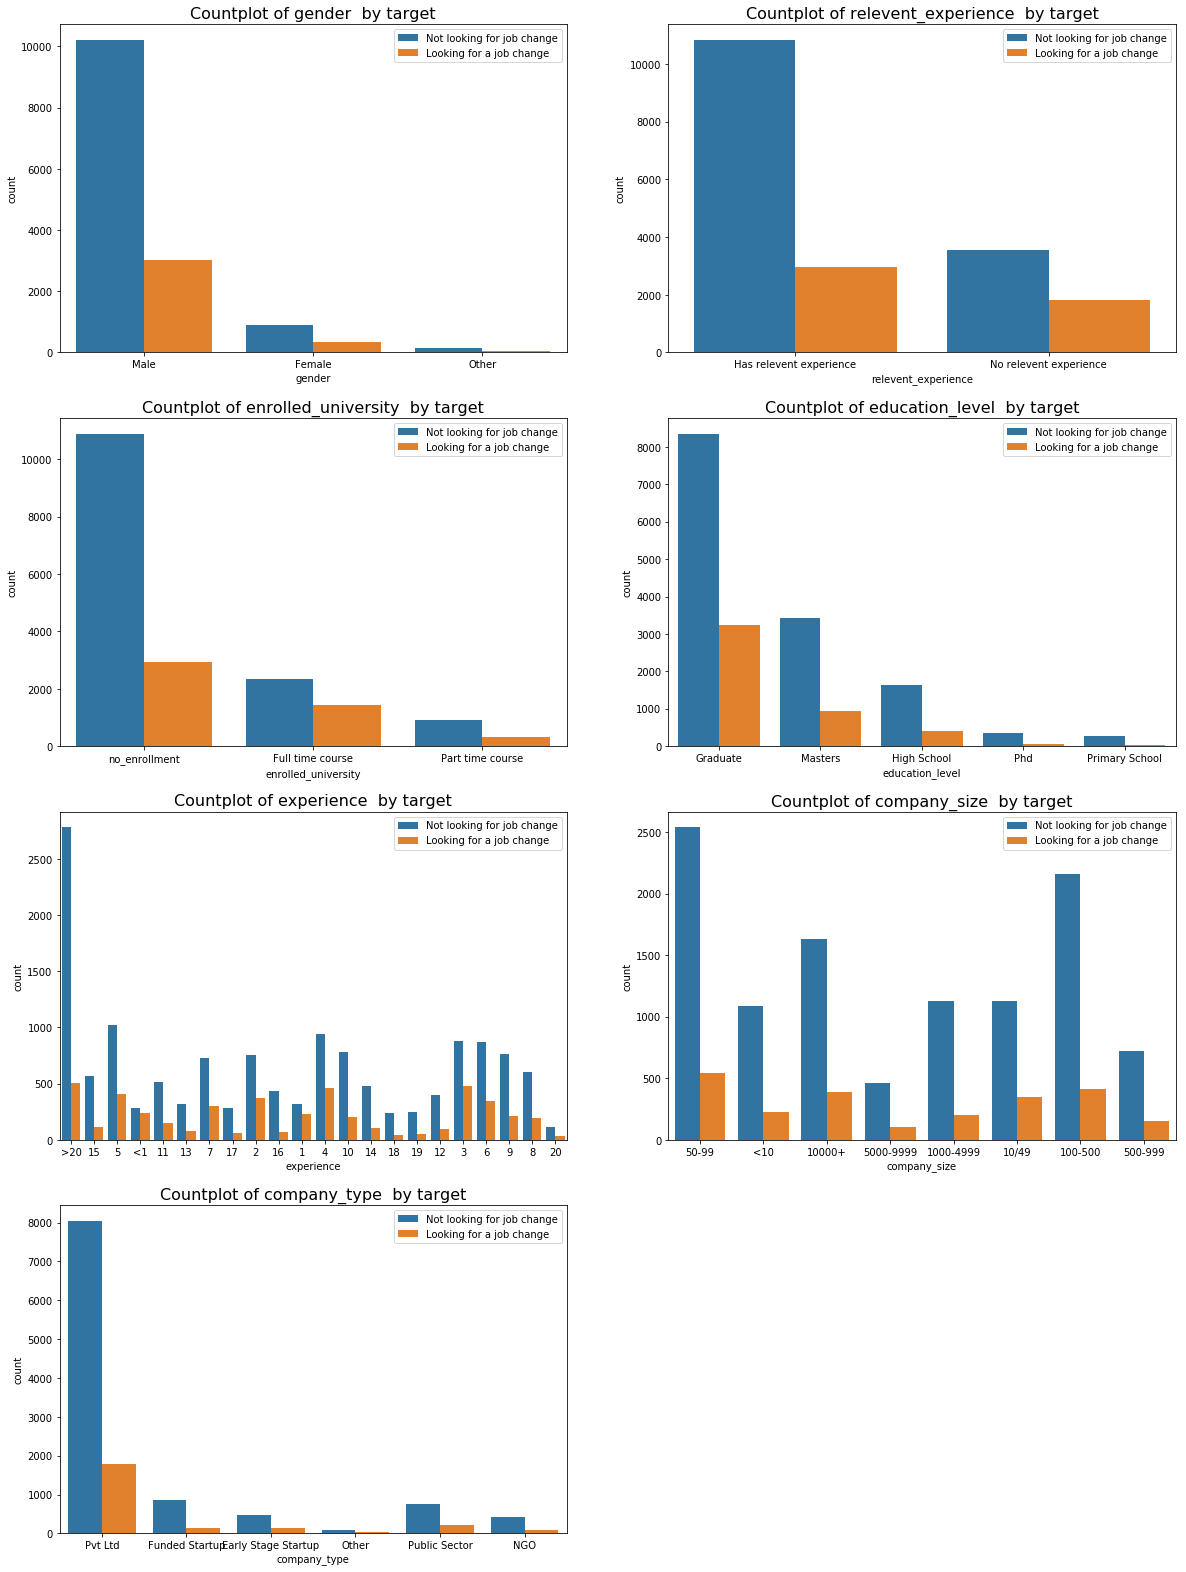

In [27]:
features= ['gender', 'relevent_experience', 'enrolled_university', 'education_level', "experience","company_size","company_type"]


plt.figure(figsize= (20,35))
i=1
for x in features:
    plt.subplot(5,2,i)
    sns.countplot(x= x, hue= 'target', data= df)
    plt.title("Countplot of {}  by {}".format( x, 'target'), fontsize= 16)
    plt.legend(['Not looking for job change', 'Looking for a job change'])
    i +=1

We wanted to group catigorical variable by the target value. We started with the boxplot of gender and target. We can see that the dataset consists of mostly males, followed by female and other. In both the male and female catigories, more canidates were looking for a job change than not.

Next, we looked at revelvant_experience by target. The data contains mostly data scientits who have revelant experience. In both of the catigories looking for a job change took up less values than not looking for a job change. 

Next, we examines the enrollment status variable. An enrollment status of "No Enrollment" is most common, followed by full time students, then part time students. Once again, the distribution of data scietists looking for a job change seems to be even throughout the catigories. 

The next grouped bar chart in this visual is education level by target. Those who have a graduate level education make up most of the data. In all catigories the looking for a job change catigory is less than not looking for a change. The distrution of these may change based on education, based on the graph. 

The rest of the grouped bar charts appear to follow the same pattern of distribution between groups and target, where looking for a job is less common than not looking for a job change. 

This information can be used to understand how our data needs to be balanced and transformed before the classification steps. 

In [ ]:
features= ['gender', 'relevent_experience', 'enrolled_university', 'education_level']


plt.figure(figsize= (20,35))
i=1
for x in features:
    plt.subplot(5,2,i)
    sns.countplot(x= x, hue= 'target', data= df)
    plt.title("Countplot of {}  by {}".format( x, 'target'), fontsize= 16)
    plt.legend(['Not looking for job change', 'Looking for a job change'])
    i +=1

The exploratory analysis helped us understand the variables and values in our data. We understand how our target variable is affected by the features in our set. Moving forward, we can preform testing to classify based on these variables. 

## Looking Forward


For the next steps of our analysis we will:
 - Continuing to clean data
 - Transform and pre-process data for model creation
 - Utilize ANOVA testing to compare job search groups against city development and training hours to determine training hour correlation with job satisfaction.to predict job change ourcome
 - Generate, explore, and test different classification models to predict job change status and understand teh variables that affect the target

Identify features that can best correlate with job transition. 
Some weaknesses of the analysis, and the dataset obtained, are: 
- This analysis does not account for the current or future state of the economy, or other short to medium term factors. 
- The dataset fails to capture gender data and company_type in a statistically significant way (a lot of missing values). This limits the kinds of analysis, thus this group avoids any strong conclusions based on these two facets. 
- There are imbalance classification problems with the dataset that come from targeting it to specific industries and sectors. 
- The dataset only captures a limited number of data types, whereas the decision to leave or stay at a job may be impacted by many other measurable factors, and may be more accurately predicted using data beyond the scope of this analysis. 
- Many features are categorical (Nominal, Ordinal, Binary), some with high cardinality so encoding methods and techniques will help to boost models performance.
- This is a classification model, ideally it would a larger number of input, so we are limited by the data available in kaggle

Opportunities created this application:
- The analysis is highly adaptable, and uses commonly available inputs that make utilization possible. This could be done by an HR department, or incorporated into any number of applications.
- This is a classification model, so it is infinitely scalable.

Though the data features are limited, their wide availability creates the opportunity for cross comparison with other metrics. 
Therefore, the data can be used by a wide range of HR companies to be integrated into thier hiring process to find the best candicates, with the highest retention rate possible. 

Threats posed by this analysis plan are: 
- Data features outside of this analysis may have a greater direct impact on employee retention, which makes it difficult to account for events outside the scope of this study. For instance, we aren’t entirely sure how COVID-19 data may skew the analysis. 
- This analysis could be immediately improved by ensuring the full capture (or as close to it) of all data features in the analysis. An employee’s gender and the type of business may have a measurable impact on outcomes. Furthermore, an increased number of data features, and a smoothing factor to account for Covid’19’s disruption of the economy might also improve the accuracy of results. 
